In [15]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

In [16]:
ca = pd.read_csv('../csv_file/train.csv')
ca.head(12)

C:\Users\user\AppData\Local\Temp\ipykernel_5840\102845736.py:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
5,2023-02-01,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10850000.0,10850000.0,10850000.0,NaN,NaN,NaN,10850000.0,10850000.0,10850000.0,0.318994
6,2022-11-01,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258853
7,2023-01-01,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
8,2023-01-01,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266285
9,2022-02-01,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [17]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [ ]:
threshold = 0.4
ca = ca.loc[:, ca.isnull().mean(axis=0) < threshold]

In [ ]:
threshold = 0.4
ca = ca[ca.isnull().mean(axis=1) < threshold]

In [20]:
ca.head(20)

,report_date,client_id,target,col1453,col1454,col2167,col2168,col2169,col2170,col2171,...,col2365,col2366,col2388,col2389,col2390,col2460,col2461,col2462,col2470,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,37.88,37.88,37.880000,0.00,0.00,0.000000,545.0,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,38.75,3.34,21.045000,0.00,0.00,0.000000,242.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,36.75,36.75,36.750000,2.10,2.10,2.100000,557.0,0.256261
3,2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,35.56,35.56,35.560000,1.40,1.40,1.400000,NaN,0.258682
4,2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,54.52,54.52,54.520000,2.28,2.28,2.280000,256.0,0.254164
5,2023-02-01,10,0,0,07ca8162-5b7d-ed11-b824-005056b89b68,0.0,0.0,3.0,3.0,3.0,...,1.0,1.0,26.60,26.60,26.600000,0.00,0.00,0.000000,31.0,0.318994
6,2022-11-01,16,0,0,0a154951-7e02-47d2-8d3d-480d0c84c206,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,35.57,2.51,19.040000,0.00,0.00,0.000000,336.0,0.258853
7,2023-01-01,17,0,0,0aed31ac-cbe2-42cb-af39-8470ad01e8a4,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,66.48,3.58,35.030000,0.00,0.00,0.000000,1972.0,0.256261
8,2023-01-01,18,0,0,0b08a6bb-42f5-ec11-b822-005056b8a6d9,0.0,0.0,0.0,3.0,6.0,...,4.0,4.0,103.00,4.50,73.450000,0.00,0.00,0.000000,68.0,0.266285
9,2022-02-01,19,0,0,0b498e8a-7c01-466d-b112-0c5785574f45,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,60.18,60.18,60.180000,0.00,0.00,0.000000,364.0,0.256261


<Figure size 1000x100 with 0 Axes>

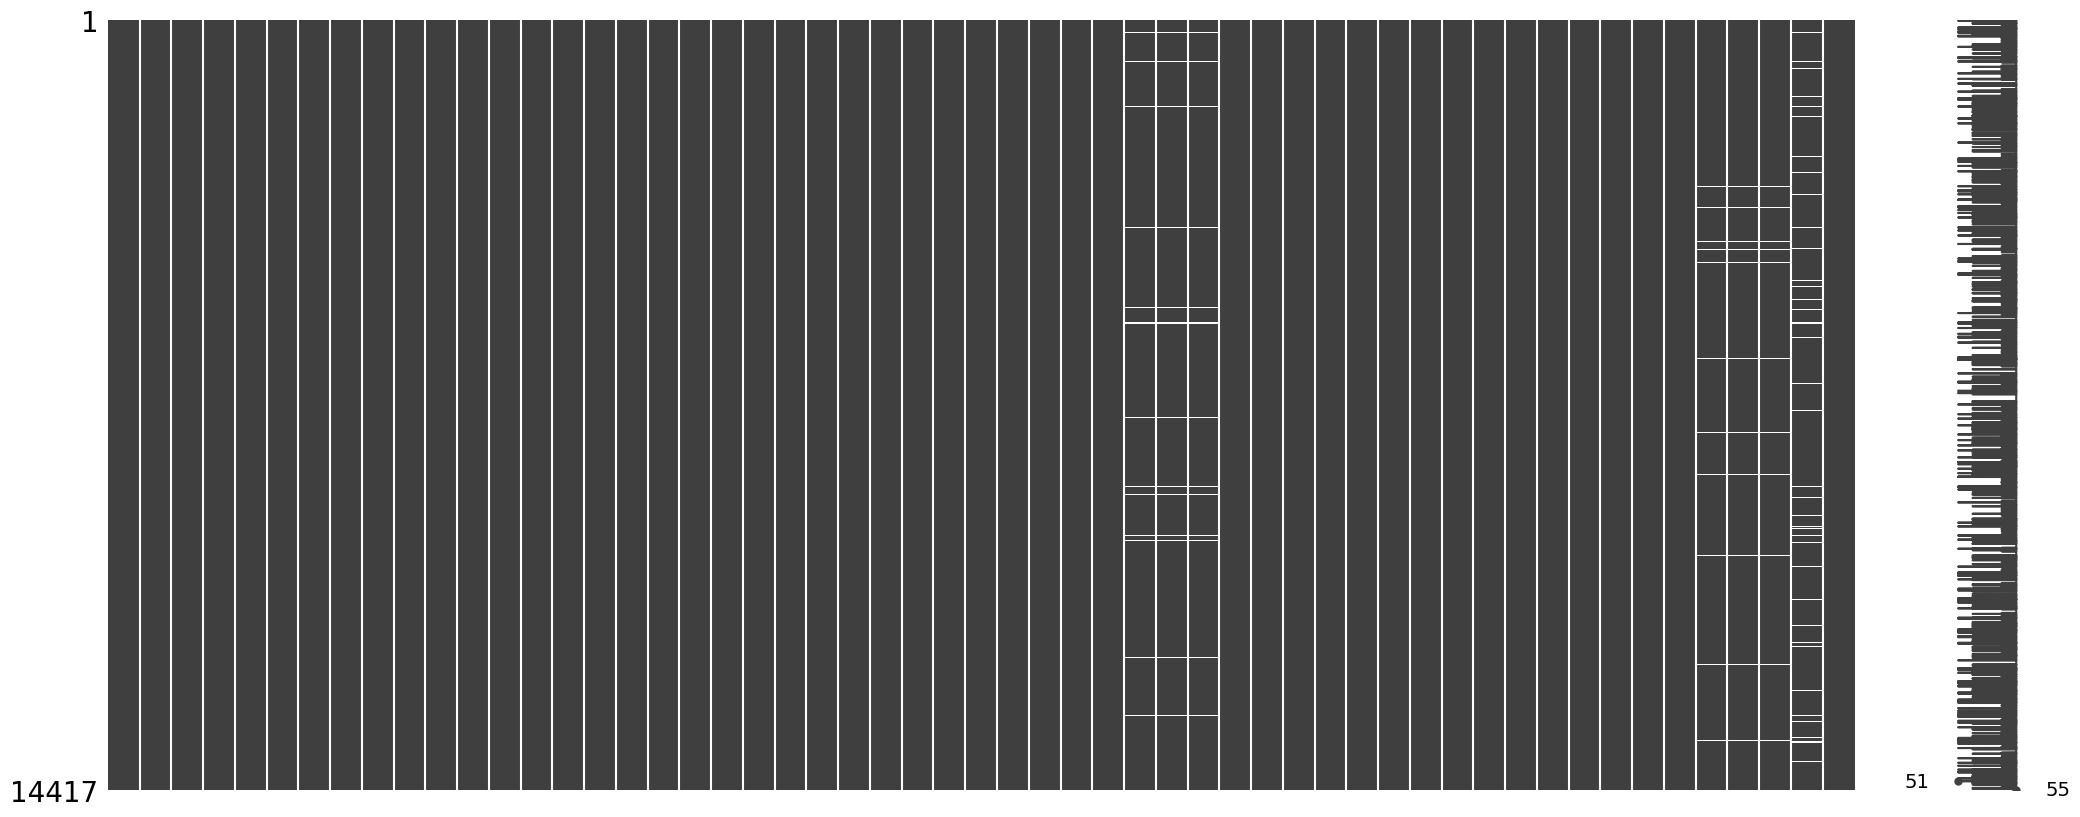

In [21]:
plt.figure(figsize=(10, 1))
msno.matrix(ca)
plt.show()

In [22]:
ca.to_csv("dogma2", index=False)